# Friction Hill

## Set Up Virtual Environment
The following creates a virtual environment folder for this project, sets it up correctly, and activates the virtual environment.

In [ ]:
import os
venvExists = os.path.isdir('venv')
if venvExists is False:
    os.mkdir("venv")
    os.system("python -m venv venv")
    os.system("pip install -r requirements.txt")
os.system(r"venv\Scripts\activate")

0

Import required packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Functions

In [ ]:
def get_pressure_slip(x, k, mu, h, b):
    pt1 = 2*mu/h
    pt2 = (0.5*b)-x
    pt3 = np.multiply(pt1,pt2)
    p_slip = 2*k*np.exp(pt3)
    return p_slip

def pressure_stick(x, k, h, b):
    pt1 = h**(-1)
    pt2 = (0.5*b)-x
    pt3 = np.multiply(pt1,pt2)
    p_stick = 2*k*(1 + pt3)
    return p_stick

def get_pressure_stick(x, k, mu, h, b):
    p_stick = pressure_stick(x, k, h, b)

    t = distance_transition(mu, h, b)

    # Correct so that the pressures meet in value
    p_stick_t = pressure_stick(t, k, h, b) - get_pressure_slip(t, k, mu, h, b)
    p_stick = p_stick-p_stick_t

    return p_stick

def distance_transition(mu, h, b):
    pt1 = h/(2*mu)
    pt2 = np.log(1/(2*mu))
    pt3 = pt1*pt2
    t = (b/2)-pt3
    # To avoid negative values
    t = max(t,0)
    return t

## Main Section
You can change the:
- $L$ - Length of the billet [m]
- $b$ - Width/breadth of the billet [m]
- $h$ - Height of the billet [m]
- $k$ - Shear yield strength [Pa]
- $\mu$ - Coefficient of friction between $0-1$
To normalise the stress set `normY` to `True`.

Transition distance = 0.069 m
F_proper = 13.08150 MN
F_slip = 15.87459 MN


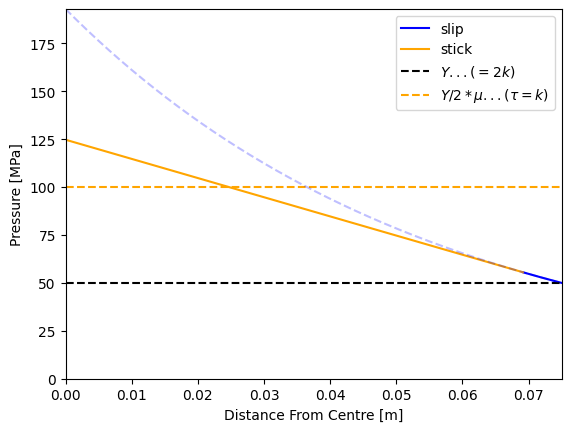

In [103]:
L = 1
b = 150E-3
h = 50E-3
k = 50E6/2
mu = 0.45

normY = False
if normY:
    normVal = (2*k)
else:
    normVal = 1E6

t = distance_transition(mu, h, b)
print(f"Transition distance = {t:.3f} m")

x_stick = np.linspace(0, t, 10000)
x_slip = np.linspace(t, b/2, 10000)

p_slip = get_pressure_slip(x_slip, k, mu, h, b)
p_stick = get_pressure_stick(x_stick, k, mu, h, b)

plt.plot(x_slip, p_slip/normVal, label='slip', c='blue')
plt.plot(x_stick, p_stick/normVal, label='stick', c='orange')
if normY:
    plt.ylabel('Pressure/2k [1]')
else:
    plt.ylabel('Pressure [MPa]')
plt.xlabel('Distance From Centre [m]')
plt.ylim(bottom=0)
plt.xlim(left=0, right=b/2)
plt.hlines(y=2*k/normVal, xmin=0, xmax=b/2, linestyles='dashed', label=r'$Y...(=2k)$', colors='black')
plt.hlines(y=4*k/normVal, xmin=0, xmax=b/2, linestyles='dashed', label=r'$Y/2*\mu...(\tau=k)$', colors='orange')
plt.legend()


f1 = np.trapezoid(p_stick, x_stick)
f2 = np.trapezoid(p_slip, x_slip)

f = L*2*(f1+f2)
print(f'F_proper = {f/1E6:.5f} MN')

x_whole = np.linspace(0, b/2, 10000)
p_slip_whole = get_pressure_slip(x_whole, k, mu, h, b)
f_justSlip = L*2*np.trapezoid(p_slip_whole, x_whole)
plt.plot(x_whole, p_slip_whole/normVal, label='slip whole', c='blue', ls='--', alpha=0.25)
plt.ylim(bottom=0, top=np.max(p_slip_whole/normVal))

print(f'F_slip = {f_justSlip/1E6:.5f} MN')